<a href="https://colab.research.google.com/github/Sindhura-tr/Deep-Learning-5-7pm/blob/main/Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sentiment Analysis

## Data Ingestion

In [63]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Sindhura-tr/Datasets/refs/heads/main/Restaurant_Reviews.tsv",sep="\t")
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [64]:
st = "Wow... Loved this place."

In [65]:
st = st.lower()
st

'wow... loved this place.'

In [66]:
import re

In [67]:
pattern = "[^a-z ]"

In [68]:
re.sub(pattern,"",st)

'wow loved this place'

## Text Preprocessing

In [69]:
def preprocess_text(text):
  # convert all the text into lower case
  text = text.lower()
  # replace text other than a-z with ""
  pattern = "[^a-z ]"
  text_new = re.sub(pattern,"",text)
  return text_new

In [70]:
preprocess_text("The selection on the menu was great and so wer...")

'the selection on the menu was great and so wer'

In [71]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [72]:
df["pre_Review"] = df["Review"].apply(preprocess_text)
df.head()

,Review,Liked,pre_Review
0,Wow... Loved this place.,1,wow loved this place
1,Crust is not good.,0,crust is not good
2,Not tasty and the texture was just nasty.,0,not tasty and the texture was just nasty
3,Stopped by during the late May bank holiday of...,1,stopped by during the late may bank holiday of...
4,The selection on the menu was great and so wer...,1,the selection on the menu was great and so wer...


## Separate X and Y features

In [73]:
X = df["pre_Review"]
Y = df["Liked"]

In [74]:
df.shape

(1000, 3)

In [75]:
X.head()

,pre_Review
0,wow loved this place
1,crust is not good
2,not tasty and the texture was just nasty
3,stopped by during the late may bank holiday of...
4,the selection on the menu was great and so wer...


In [76]:
X.shape

(1000,)

In [77]:
Y.head()

,Liked
0,1
1,0
2,0
3,1
4,1


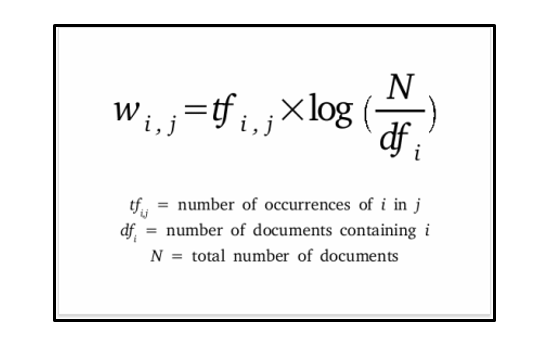

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [79]:
tfidf = TfidfVectorizer()

In [80]:
xpre = tfidf.fit_transform(X).toarray()

In [81]:
xpre.shape

(1000, 2046)

In [82]:
xpre

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Apply train test split

In [83]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(xpre,Y,train_size=0.75,random_state=21)

In [84]:
xtrain.shape

(750, 2046)

In [85]:
xtest.shape

(250, 2046)

## Build Neural network model

In [86]:
from keras.models import Sequential
from keras.layers import Input,Dense,Dropout
from keras.callbacks import EarlyStopping

In [87]:
# Initialize the model
model = Sequential()
# Add the input layer
model.add(Input(shape=(xtrain.shape[1],)))
# Add hidden layer1
model.add(Dense(units=64,activation="relu"))
# Add dropout layer
model.add(Dropout(0.3))
# Add hidden layer2
model.add(Dense(units=32,activation="relu"))
# Add dropout layer
model.add(Dropout(0.2))
# Output layer
model.add(Dense(units=1,activation='sigmoid'))

In [88]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │       131,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 133,121 (520.00 KB)

 Trainable params: 133,121 (520.00 KB)

 Non-trainable params: 0 (0.00 B)

In [89]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [117]:
es = EarlyStopping(monitor="val_loss",patience=15)

In [118]:
hist = model.fit(xtrain,ytrain,validation_split=0.2,epochs=200,callbacks=[es])

Epoch 1/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 6.5425e-04 - val_accuracy: 0.7467 - val_loss: 0.8774
Epoch 2/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 4.3175e-04 - val_accuracy: 0.7400 - val_loss: 0.8800
Epoch 3/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 5.9291e-04 - val_accuracy: 0.7267 - val_loss: 0.8954
Epoch 4/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 5.1682e-04 - val_accuracy: 0.7267 - val_loss: 0.9005
Epoch 5/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 4.3505e-04 - val_accuracy: 0.7133 - val_loss: 0.9065
Epoch 6/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 2.9993e-04 - val_accuracy: 0.7133 - val_loss: 0.9135
Epoch 7/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 3.4083e-04 - val_accuracy: 0.7133 - val_loss: 0.9205
Epoch 8/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 3

## Evaluate the model

In [119]:
model.evaluate(xtrain,ytrain)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9907 - loss: 0.0323     


[0.1908724009990692, 0.9453333616256714]

In [120]:
model.evaluate(xtest,ytest)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8304 - loss: 0.5914 


[0.7230232357978821, 0.7919999957084656]

In [121]:
probs = model.predict(xtest)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [122]:
preds[:5]

array([[7.647624e-02],
       [1.921084e-04],
       [9.958460e-01],
       [9.999716e-01],
       [9.998115e-01]], dtype=float32)

In [123]:
def predict_sentiment(model,x):
  yprob = model.predict(x)
  ypred = [1 if prob>=0.5 else 0 for prob in yprob]
  return ypred

In [124]:
ypred_test = predict_sentiment(model,xtest)
ypred_test[:5]

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


[0, 0, 1, 1, 1]

In [125]:
ytest.head()

,Liked
492,0
383,0
856,1
834,1
603,1


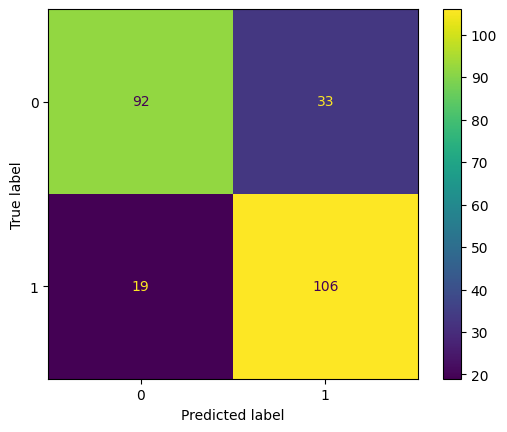

In [126]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
ConfusionMatrixDisplay.from_predictions(ytest,ypred_test)

In [127]:
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           0       0.83      0.74      0.78       125
           1       0.76      0.85      0.80       125

    accuracy                           0.79       250
   macro avg       0.80      0.79      0.79       250
weighted avg       0.80      0.79      0.79       250



## ROC Receiever Operator characteristics

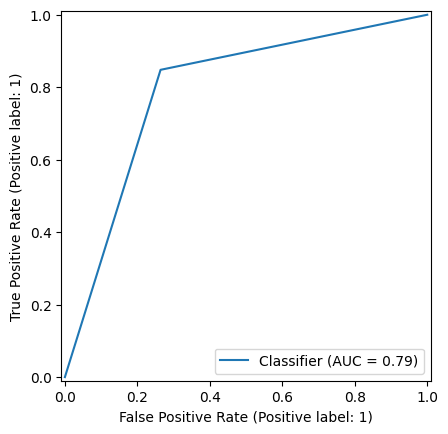

In [128]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(ytest,ypred_test)

## Final predictions

In [129]:
text1 = "Took an hour to get our food only 4 tables in restaurant my food was Luke warm, Our sever was running around like he was totally overwhelmed."

In [134]:
def out_of_sample(text):
  # for new data, always preprocess the text, apply tfidf and then give that to model
  text = preprocess_text(text)
  text_pre = tfidf.transform([text]).toarray()
  prob = model.predict(text_pre)
  if prob>=0.5:
    return 1
  else:
    return 0

In [135]:
out_of_sample(text1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


0

In [136]:
def out_of_sample(text):
  text = preprocess_text(text)
  text_pre = tfidf.transform([text]).toarray()
  prob = model.predict(text_pre)
  if prob>=0.5:
    return "Positive"
  else:
    return "Negative"

In [137]:
out_of_sample(text1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


'Negative'

## Save the model

In [138]:
model.save("SentimentAnalysis.keras")

In [139]:
from keras.models import load_model
m = load_model('/content/SentimentAnalysis.keras')
m.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │       131,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 399,365 (1.52 MB)

 Trainable params: 133,121 (520.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 266,244 (1.02 MB)